In [44]:
from numpy import linspace
import sys

In [32]:
ra = -2.0	# fractal is drawn from z0 = ra + ia*j to z1 = rb + ib*j
rb =  1.0	# whole (?) set: ra = -2.0, rb= 1.0, ia = -1.0, ib= 1.0

ia = -2.0
ib =  2.0

In [33]:
# maxx/maxy best 3/2, it's width/height [in ascii chars!]
maxx = 60.0
maxy = maxx*0.5*(ib - ia)/(rb - ra)

In [34]:
brdr = 5.0	# look for right brdr by guess :p

maxiter = 200
# maxiter defines precision of telling if a point
# belongs to the set;
# it should be: d(maxiter)/d(min(|rb - ra|,|ib - ia|)) < 0,
# meaning: if you magnify, it's harder to tell the points apart
# also: higher value => slower, but better quality

In [35]:
pix = 'W'	# it's PIXel, HALf, and EMPty - program's brushes
hal = 'x'
emp = '.'

In [42]:
[(i,-i) for i in range(1,100)]

[(1, -1),
 (2, -2),
 (3, -3),
 (4, -4),
 (5, -5),
 (6, -6),
 (7, -7),
 (8, -8),
 (9, -9),
 (10, -10),
 (11, -11),
 (12, -12),
 (13, -13),
 (14, -14),
 (15, -15),
 (16, -16),
 (17, -17),
 (18, -18),
 (19, -19),
 (20, -20),
 (21, -21),
 (22, -22),
 (23, -23),
 (24, -24),
 (25, -25),
 (26, -26),
 (27, -27),
 (28, -28),
 (29, -29),
 (30, -30),
 (31, -31),
 (32, -32),
 (33, -33),
 (34, -34),
 (35, -35),
 (36, -36),
 (37, -37),
 (38, -38),
 (39, -39),
 (40, -40),
 (41, -41),
 (42, -42),
 (43, -43),
 (44, -44),
 (45, -45),
 (46, -46),
 (47, -47),
 (48, -48),
 (49, -49),
 (50, -50),
 (51, -51),
 (52, -52),
 (53, -53),
 (54, -54),
 (55, -55),
 (56, -56),
 (57, -57),
 (58, -58),
 (59, -59),
 (60, -60),
 (61, -61),
 (62, -62),
 (63, -63),
 (64, -64),
 (65, -65),
 (66, -66),
 (67, -67),
 (68, -68),
 (69, -69),
 (70, -70),
 (71, -71),
 (72, -72),
 (73, -73),
 (74, -74),
 (75, -75),
 (76, -76),
 (77, -77),
 (78, -78),
 (79, -79),
 (80, -80),
 (81, -81),
 (82, -82),
 (83, -83),
 (84, -84),
 (85, -85)

In [38]:
enumerate([i for i in 1:100])

SyntaxError: invalid syntax (<ipython-input-38-7442a5bb2ec5>, line 1)

In [ ]:
for ia, ib in [(i,-i) for i in range(-1,150)]:
    for imaginary in linspace(ia, ib, maxy):
        line = ''
        for real in linspace(ra, rb, maxx):
            z0 = z = real + imaginary*1j
            for i in range(maxiter):
                z = z*z + z0	# <- all magic is here!
            if (abs(z.real)*15<brdr) and (abs(z.imag)*15<brdr):
                line += hal
            elif ((abs(z.real)<brdr)&(abs(z.imag)<brdr)):
                line += pix
            else:
                line += emp
    sys.stdout.write('\r'+str(i))
    time.sleep(0.5)

https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift?lang=en

In [66]:
import numpy as np
from numba import jit
 

In [67]:
@jit
def mandelbrot(c,maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0

In [68]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline
 
def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=256):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(z.T,origin='lower') 
    
#     save_image(fig)


In [69]:
@jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)

In [78]:
def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=80,cmap='jet'):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    ax.set_title(cmap)
    
    ax.imshow(z.T,cmap=cmap,origin='lower') 
    
#     save_image(fig)

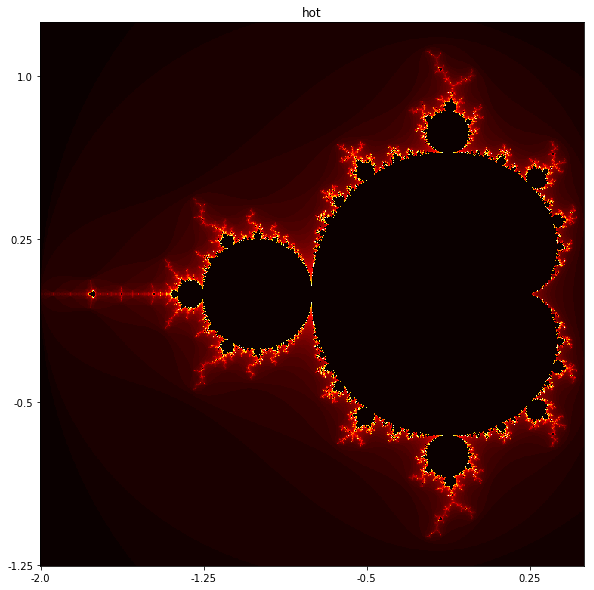

In [79]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,cmap='hot')

In [80]:
def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,\
                     maxiter=80,cmap='jet',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    ax.set_title(cmap)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm)  
    
#     save_image(fig)

NameError: name 'save_image' is not defined

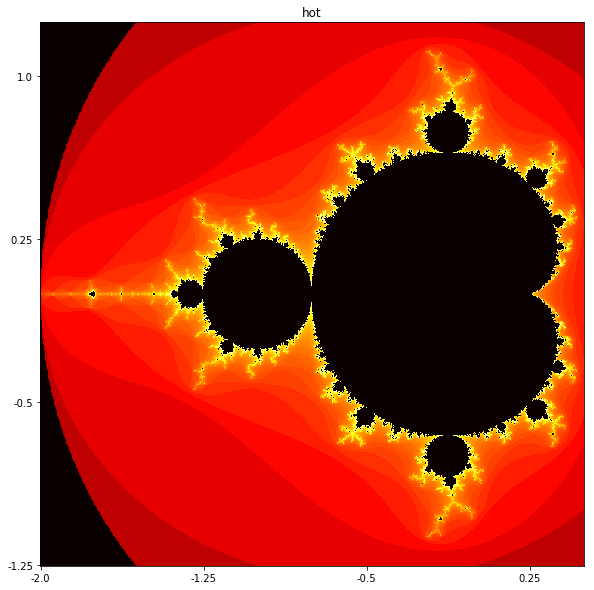

In [82]:
 mandelbrot_image(-2.0,0.5,-1.25,1.25,cmap='hot')